In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [49]:
df = pd.read_csv("../data/winemag-data_first150k.csv")
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


### Amostragem

Como o dataset possui muito dados, cerca de 150 mil linhas, foi realizado uma amostragem com under-sampling para reduzir o tamanho do dataset facilitando assim seu processamento e visualização.

In [51]:
sampled_df = df.sample(n = 50000, random_state=42)
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 82957 to 37218
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   50000 non-null  int64  
 1   country      49999 non-null  object 
 2   description  50000 non-null  object 
 3   designation  34773 non-null  object 
 4   points       50000 non-null  int64  
 5   price        45501 non-null  float64
 6   province     49999 non-null  object 
 7   region_1     41604 non-null  object 
 8   region_2     20086 non-null  object 
 9   variety      50000 non-null  object 
 10  winery       50000 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 4.6+ MB


### Preenchimento com Interpolação

Como há linhas do atributo preço com dados faltantes realizou-se uma interpolação linear para preenche-los.

In [52]:
interpolated_df = sampled_df.interpolate(method='linear')
interpolated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 82957 to 37218
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   50000 non-null  int64  
 1   country      49999 non-null  object 
 2   description  50000 non-null  object 
 3   designation  34773 non-null  object 
 4   points       50000 non-null  int64  
 5   price        50000 non-null  float64
 6   province     49999 non-null  object 
 7   region_1     41604 non-null  object 
 8   region_2     20086 non-null  object 
 9   variety      50000 non-null  object 
 10  winery       50000 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 4.6+ MB


### Remoção de dados faltantes

Há uma ocorrência nos dados que não conta com o valor de país e uma que não conta com o valor de província, estas serão removidas.

In [53]:
columns_na = ["province", "country"]
dropped_na_df = interpolated_df.dropna(subset=columns_na)
dropped_na_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49999 entries, 82957 to 37218
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   49999 non-null  int64  
 1   country      49999 non-null  object 
 2   description  49999 non-null  object 
 3   designation  34772 non-null  object 
 4   points       49999 non-null  int64  
 5   price        49999 non-null  float64
 6   province     49999 non-null  object 
 7   region_1     41604 non-null  object 
 8   region_2     20086 non-null  object 
 9   variety      49999 non-null  object 
 10  winery       49999 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 4.6+ MB


### Discretização / mapeamento do domínio de atributos / OneHotEncode

Serão transformados em valores discretos as colunas de país, província e variedade. 

In [54]:
# Convertendo os atributos categóricos em numericos, para tornar privado os nomes dos profissionais 
# e facilitar na plotagem dos dados
categorical = ["country", "province", "variety"]


LE = LabelEncoder()
discretized_df = dropped_na_df
discretized_df[categorical] = discretized_df[categorical].apply(LE.fit_transform)
""" for i in categorical:
    final_df[i]=final_df[[i]].apply(LE.fit_transform)

final_df.head() """

discretized_df.head()

/tmp/ipykernel_6582/1738252321.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discretized_df[categorical] = discretized_df[categorical].apply(LE.fit_transform)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
82957,82957,0,"A cool cherry aroma and a mild, creamy paste n...",Colección,84,10.0,185,Mendoza,NaN,204,Finca Los Maza
60768,60768,14,This lightweight Pinot could use a larger help...,NaN,81,18.0,24,NaN,NaN,321,Fischer
63047,63047,39,Pure Syrah from a great lineup of vineyards. I...,NaN,93,42.0,372,Columbia Valley (WA),Columbia Valley,413,Basel Cellars
71004,71004,7,Heavy aromas of horse stable and compost give ...,Tribute,81,17.0,69,NaN,NaN,392,Caliterra
78169,78169,39,"The is dry and well balanced, with red licoric...",Reserve,88,35.0,46,Paso Robles,Central Coast,321,Cerro Prieto


### Normalização

Serão adicionados duas colunas ao dataset contendo a normalização dos dados relativos ao preço e pontos dos vinhos.

In [55]:
scaler = StandardScaler()
scaler.fit(discretized_df.iloc[:, 4:6])
normalized_df = discretized_df
normalized_df[["price_n", "points_n"]] = scaler.transform(discretized_df.iloc[:, 4:6])


normalized_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49999 entries, 82957 to 37218
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   49999 non-null  int64  
 1   country      49999 non-null  int64  
 2   description  49999 non-null  object 
 3   designation  34772 non-null  object 
 4   points       49999 non-null  int64  
 5   price        49999 non-null  float64
 6   province     49999 non-null  int64  
 7   region_1     41604 non-null  object 
 8   region_2     20086 non-null  object 
 9   variety      49999 non-null  int64  
 10  winery       49999 non-null  object 
 11  price_n      49999 non-null  float64
 12  points_n     49999 non-null  float64
dtypes: float64(3), int64(5), object(5)
memory usage: 5.3+ MB


/tmp/ipykernel_6582/3027996916.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normalized_df[["price_n", "points_n"]] = scaler.transform(discretized_df.iloc[:, 4:6])
/tmp/ipykernel_6582/3027996916.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normalized_df[["price_n", "points_n"]] = scaler.transform(discretized_df.iloc[:, 4:6])


### Seleção de características

Como o objetivo, por hora, é realizar uma análise exploratória dos dados a seleção de características será feita manualmente, deixando somentes os dados que serão visualizados de alguma forma.

In [56]:
final_features = ["country", "points", "price", "province", "variety"]

final_df = normalized_df[final_features]
final_df.head()

,country,points,price,province,variety
82957,0,84,10.0,185,204
60768,14,81,18.0,24,321
63047,39,93,42.0,372,413
71004,7,81,17.0,69,392
78169,39,88,35.0,46,321


In [57]:
# Descrição numérica dos dados
final_df.describe()

,country,points,price,province,variety
count,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000
mean,25.776016,87.889158,33.059871,162.320646,253.377228
std,13.732503,3.227508,33.537563,123.770511,147.164034
min,0.000000,80.000000,4.000000,0.000000,0.000000
25%,12.000000,86.000000,16.000000,46.000000,85.000000
50%,30.000000,88.000000,25.000000,158.000000,321.000000
75%,39.000000,90.000000,40.000000,272.000000,357.000000
max,41.000000,100.000000,1400.000000,384.000000,505.000000


In [58]:
# Buscando informações sobre o Dataset
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49999 entries, 82957 to 37218
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   49999 non-null  int64  
 1   points    49999 non-null  int64  
 2   price     49999 non-null  float64
 3   province  49999 non-null  int64  
 4   variety   49999 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 2.3 MB


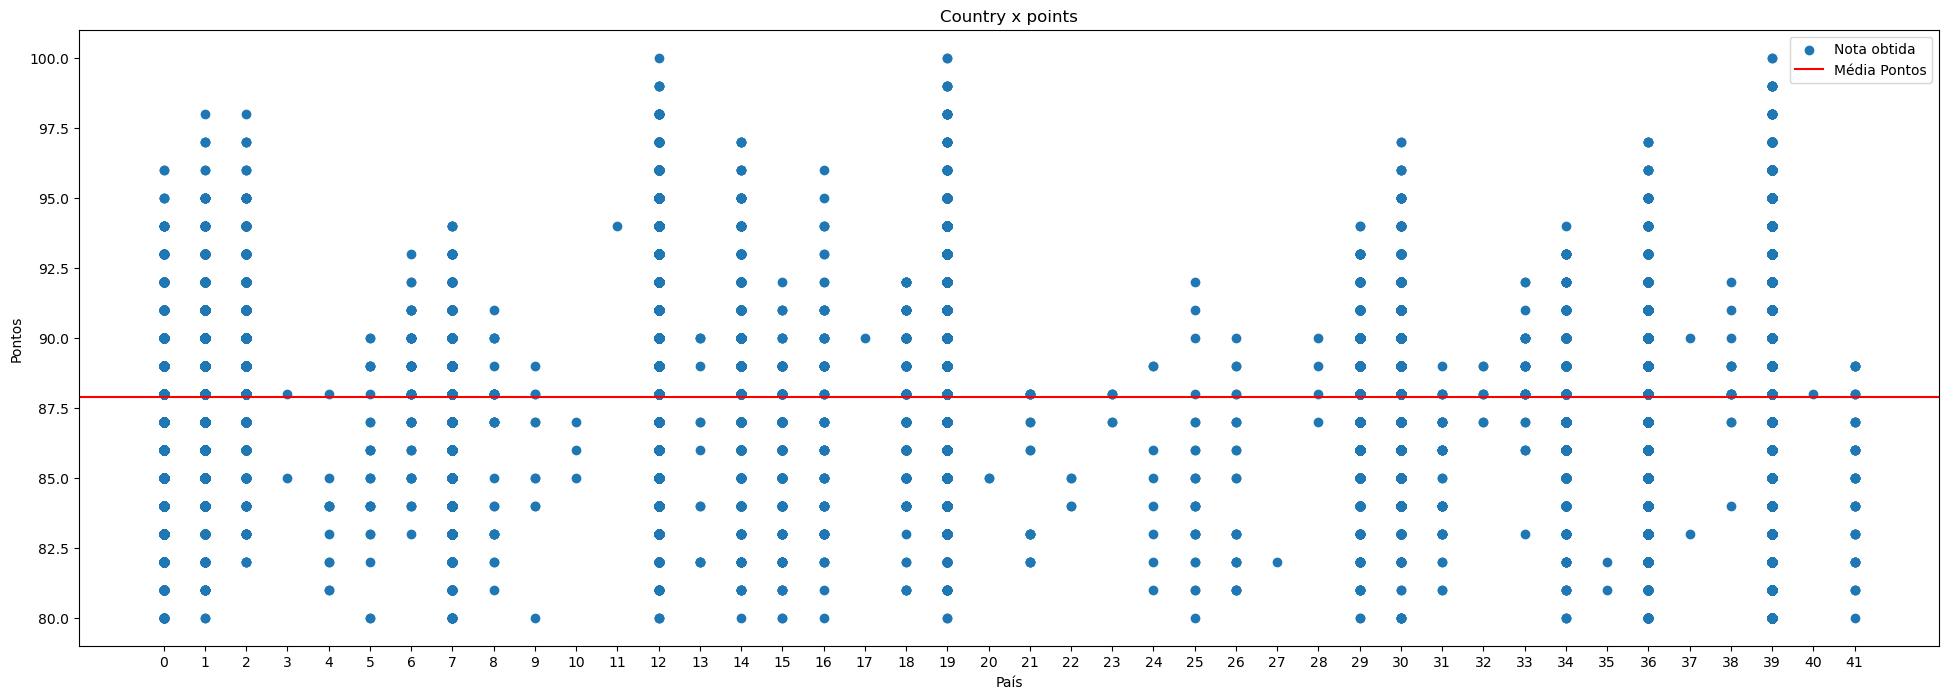

In [59]:
# Gráfico de pontos
fig, ax = plt.subplots(figsize=(24,8))
plt.scatter(x = final_df['country'], y = final_df['points'], label='Nota obtida')

# Configurando a escala do eixo x
plt.xticks(range(0, max(final_df['country']) + 1, 1))
# Título
plt.title(f'Country x points')
labels = ["Pontos", "Média geral dos pontos"]
handles, _ = ax.get_legend_handles_labels()

# Slice list to remove first handle
plt.legend(handles = handles[1:], labels = labels)
# Títulos dos eixos
plt.xlabel('País')
plt.ylabel('Pontos')
# Traçado da média da nota
plt.axhline(final_df["points"].mean(), color='r', label='Média Pontos');
plt.legend()
_ = plt.show()

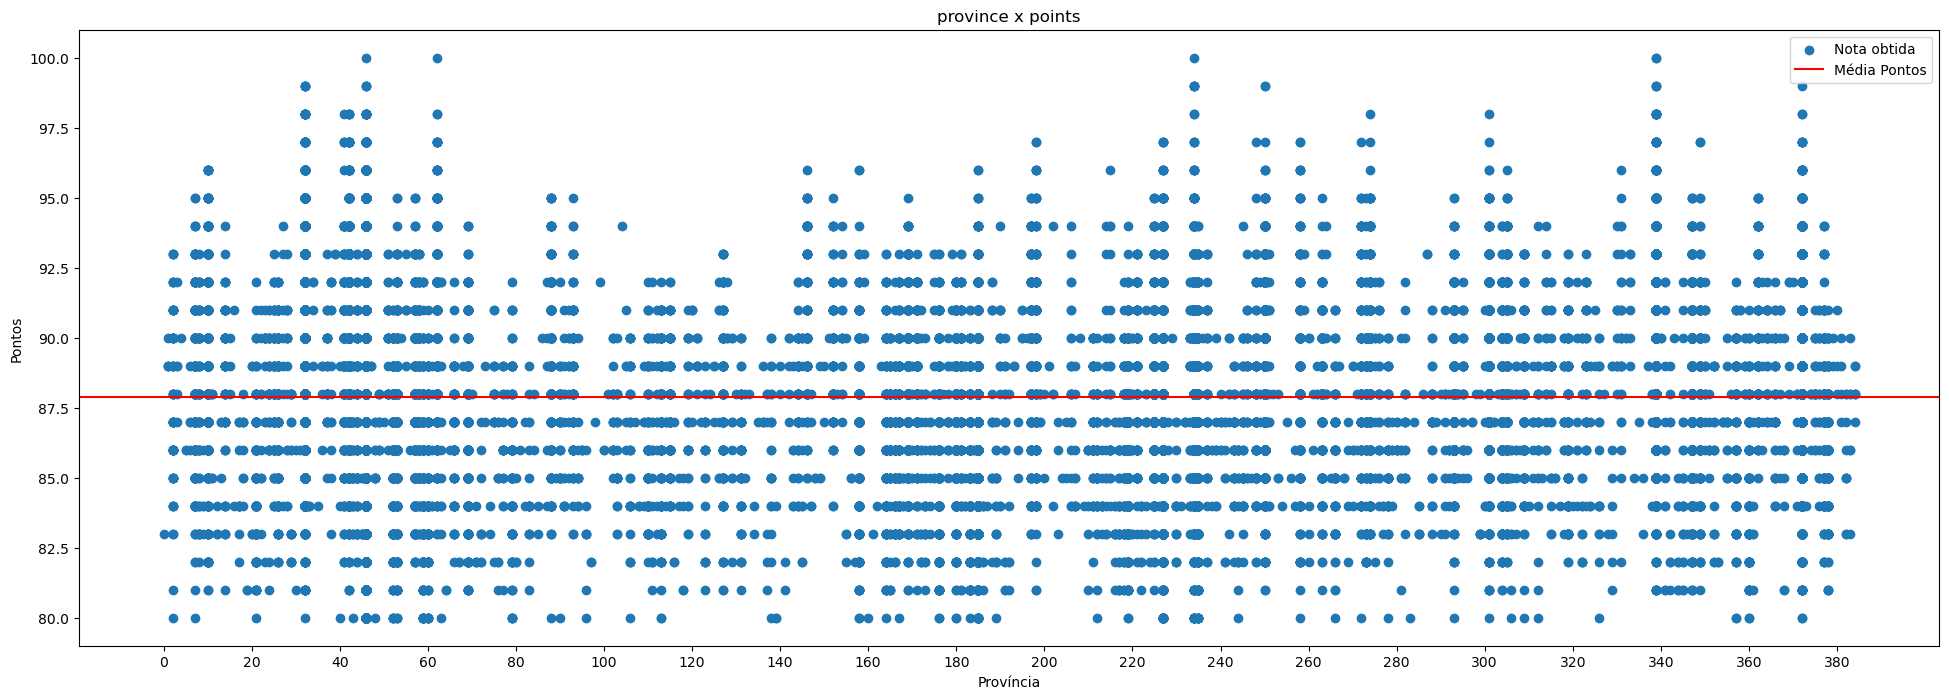

In [63]:
# Gráfico de pontos
fig, ax = plt.subplots(figsize=(24,8))
plt.scatter(x = final_df['province'], y = final_df['points'], label='Nota obtida')

# Configurando a escala do eixo x
plt.xticks(range(0, max(final_df['province']) + 1, 20))
# Título
plt.title(f'province x points')
labels = ["Pontos", "Média geral dos pontos"]
handles, _ = ax.get_legend_handles_labels()

# Slice list to remove first handle
plt.legend(handles = handles[1:], labels = labels)
# Títulos dos eixos
plt.xlabel('Província')
plt.ylabel('Pontos')
# Traçado da média da nota
plt.axhline(final_df["points"].mean(), color='r', label='Média Pontos');
plt.legend()
_ = plt.show()

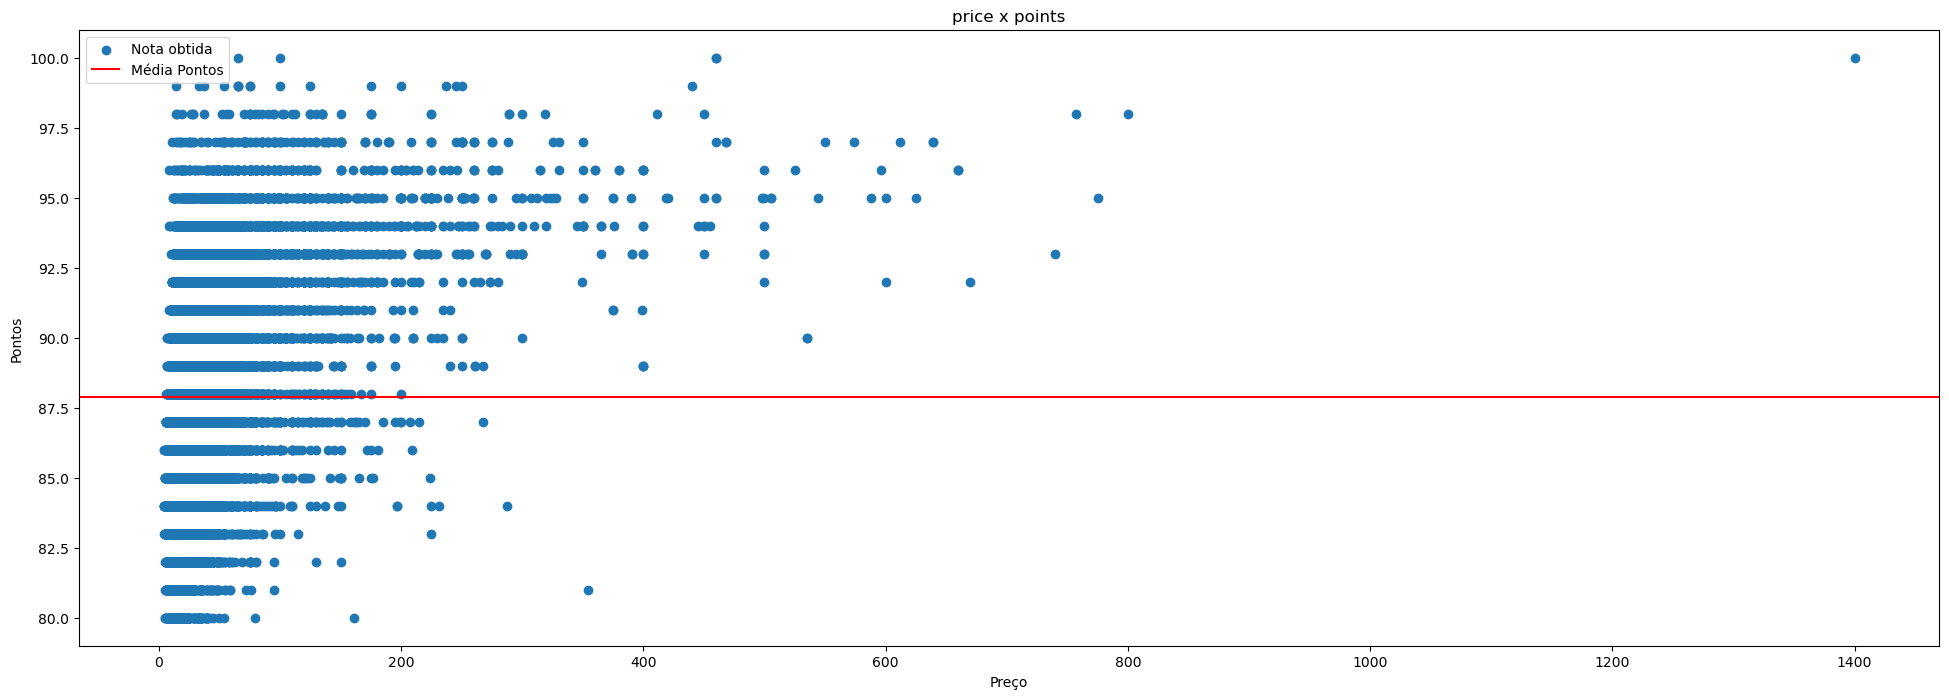

In [69]:
# Gráfico de pontos
fig, ax = plt.subplots(figsize=(24,8))
plt.scatter(final_df['price'], final_df['points'], label='Nota obtida')

# Título
plt.title(f'price x points')
labels = ["NPontos", "Média geral dos pontos"]
handles, _ = ax.get_legend_handles_labels()

# Slice list to remove first handle
plt.legend(handles = handles[1:], labels = labels)
# Títulos dos eixos
plt.xlabel('Preço')
plt.ylabel('Pontos')
# Traçado da média da nota
plt.axhline(final_df["points"].mean(), color='r', label='Média Pontos');
plt.legend()
_ = plt.show()

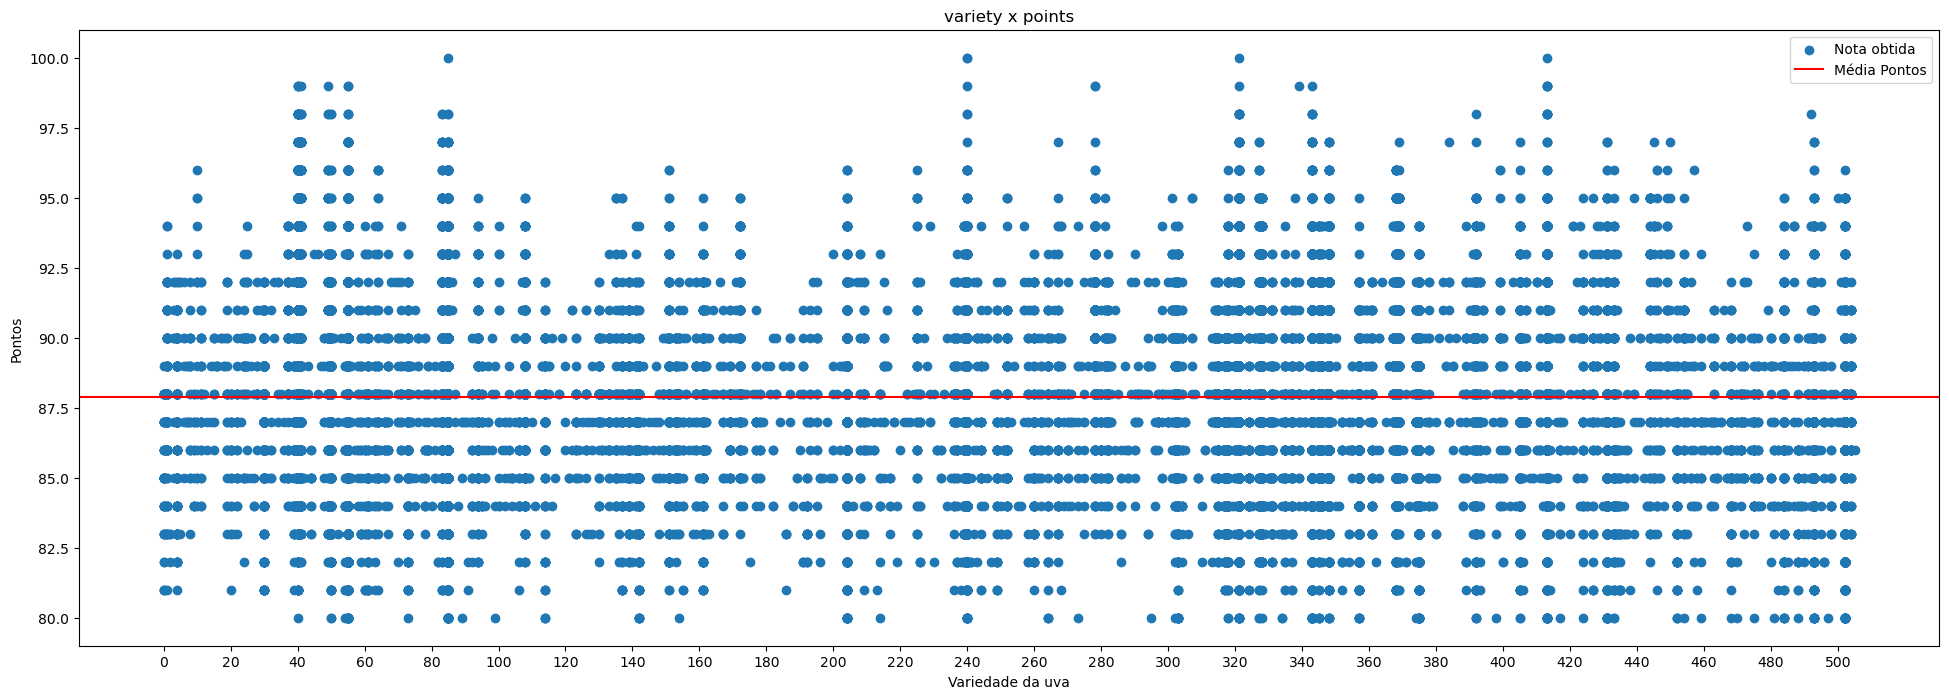

In [ ]:
# Gráfico de pontos
fig, ax = plt.subplots(figsize=(24,8))
plt.scatter(x = final_df['variety'], y = final_df['points'], label='Nota obtida')

# Configurando a escala do eixo x
plt.xticks(range(0, max(final_df['variety']) + 1, 20))

# Título
plt.title(f'variety x points')
labels = ["NPontos", "Média geral dos pontos"]
handles, _ = ax.get_legend_handles_labels()

# Slice list to remove first handle
plt.legend(handles = handles[1:], labels = labels)
# Títulos dos eixos
plt.xlabel('Variedade da uva')
plt.ylabel('Pontos')
# Traçado da média da nota
plt.axhline(final_df["points"].mean(), color='r', label='Média Pontos');
plt.legend()
_ = plt.show()